In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread("C:/Users/ravi ranjan verma/OneDrive/Desktop/Project2/model/text_images/_92385994_mediaitem92385992.jpg")
img.shape

(549, 976, 3)

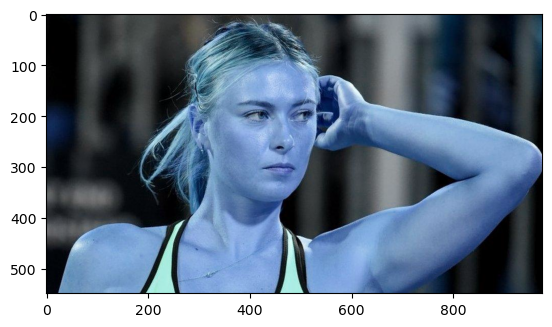

In [6]:
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(549, 976)

In [8]:
gray

array([[17, 14, 11, ..., 52, 53, 54],
       [18, 16, 12, ..., 52, 53, 53],
       [19, 16, 13, ..., 54, 53, 52],
       ...,
       [ 9,  8,  8, ...,  0,  1,  1],
       [ 9,  8,  8, ...,  0,  1,  1],
       [ 9,  8,  8, ...,  0,  1,  1]], dtype=uint8)

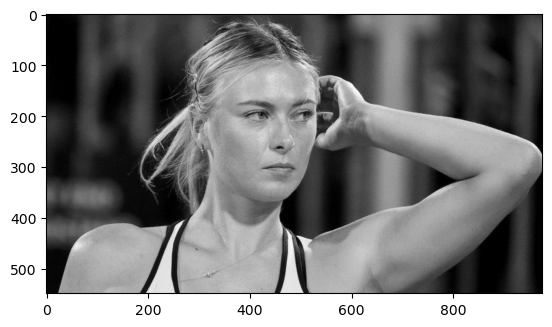

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier("C:/Users/ravi ranjan verma/OneDrive/Desktop/Project2/model/opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray)
faces

array([[343, 105, 240, 240]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(343, 105, 240, 240)

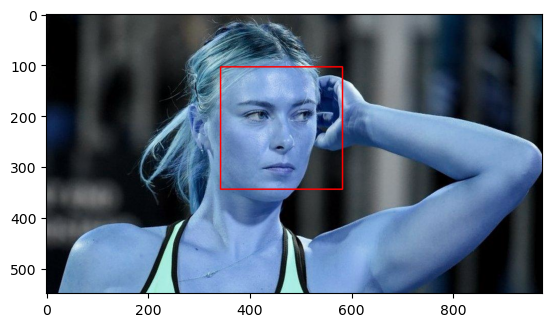

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

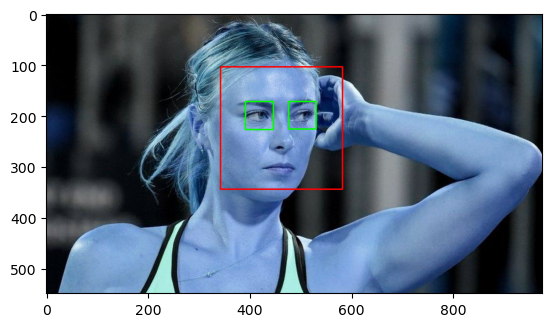

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

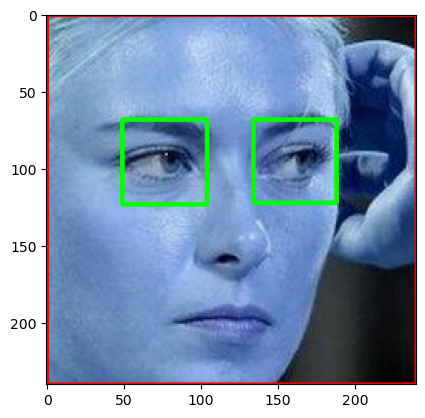

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
cropped_img = np.array(roi_color)
cropped_img.shape

(240, 240, 3)

In [16]:
import pywt
import numpy as np
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

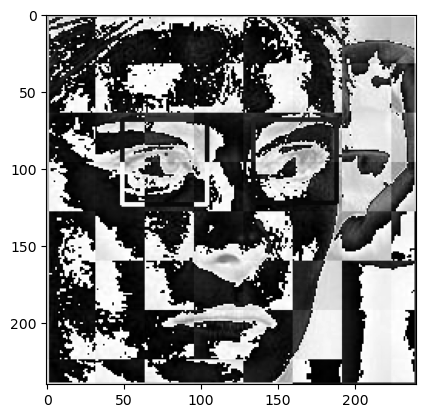

In [17]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

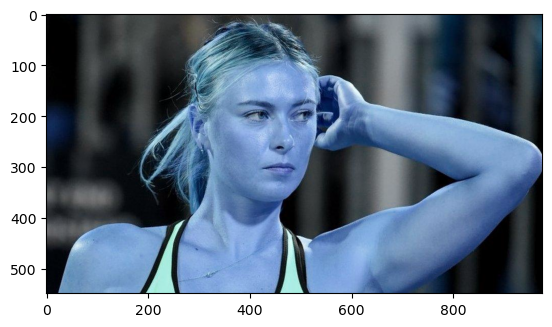

In [19]:
original_image = cv2.imread('C:/Users/ravi ranjan verma/OneDrive/Desktop/Project2/model/text_images/_92385994_mediaitem92385992.jpg')
plt.imshow(original_image)

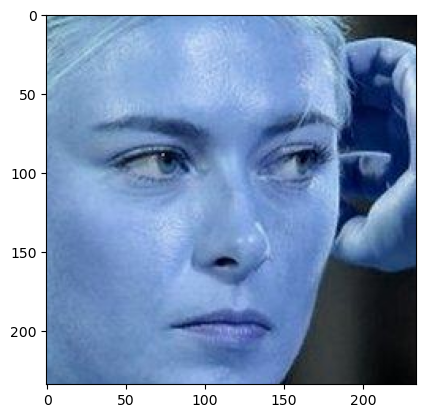

In [20]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/ravi ranjan verma/OneDrive/Desktop/Project2/model/text_images/_92385994_mediaitem92385992.jpg')
plt.imshow(cropped_image)

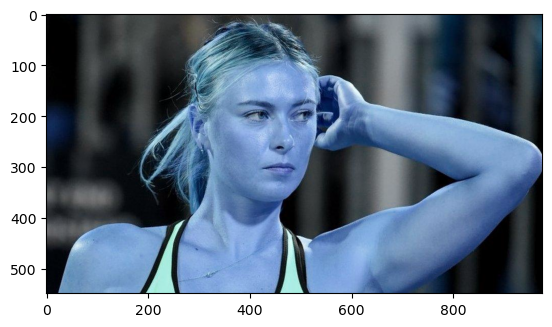

In [21]:
org_image_obstructed = cv2.imread('C:/Users/ravi ranjan verma/OneDrive/Desktop/Project2/model/text_images/_92385994_mediaitem92385992.jpg')
plt.imshow(org_image_obstructed)

In [22]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/Users/ravi ranjan verma/OneDrive/Desktop/Project2/model/text_images/_92385994_mediaitem92385992.jpg')
cropped_image_no_2_eyes

array([[[ 79, 124, 138],
        [ 99, 144, 158],
        [126, 169, 184],
        ...,
        [  9,  12,  16],
        [ 10,  13,  17],
        [ 11,  14,  18]],

       [[123, 166, 181],
        [142, 185, 200],
        [154, 196, 209],
        ...,
        [ 10,  13,  17],
        [ 10,  13,  17],
        [ 12,  15,  19]],

       [[158, 199, 214],
        [150, 192, 205],
        [134, 173, 187],
        ...,
        [ 10,  13,  17],
        [ 11,  14,  18],
        [ 12,  15,  19]],

       ...,

       [[ 89, 126, 170],
        [ 85, 122, 166],
        [ 84, 121, 165],
        ...,
        [  9,   8,  10],
        [ 10,   9,  11],
        [ 12,  11,  13]],

       [[ 90, 127, 171],
        [ 88, 125, 169],
        [ 86, 123, 167],
        ...,
        [  9,   8,  10],
        [ 10,   9,  11],
        [ 11,  10,  12]],

       [[ 90, 127, 171],
        [ 89, 126, 170],
        [ 88, 125, 169],
        ...,
        [  8,   7,   9],
        [  9,   8,  10],
        [ 11,  10,  12]]

In [23]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [24]:

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [25]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [26]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [27]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [28]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [29]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [30]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [31]:

len(X[0])

4096

In [32]:
32*32*3 + 32*32

4096

In [33]:
X[0]

array([[ 49],
       [ 37],
       [ 37],
       ...,
       [249],
       [237],
       [  3]], dtype=uint8)

In [34]:

y[0]

0

In [35]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(93, 4096)

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.7916666666666666

In [58]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.67      1.00      0.80         6
           2       1.00      0.20      0.33         5
           3       0.67      1.00      0.80         2

    accuracy                           0.79        24
   macro avg       0.81      0.78      0.71        24
weighted avg       0.85      0.79      0.75        24



In [91]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [82]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='scale',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },
    'RandomizedSearchCV' : {
        
    }
}

In [83]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.620879,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.447253,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.621978,{'logisticregression__C': 1}


In [84]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [85]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [86]:
best_estimators['random_forest'].score(X_test,y_test)

0.5

In [87]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7916666666666666

In [88]:
best_clf = best_estimators['svm']

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[9, 0, 0, 2],
       [0, 6, 0, 0],
       [0, 2, 3, 0],
       [0, 0, 0, 2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

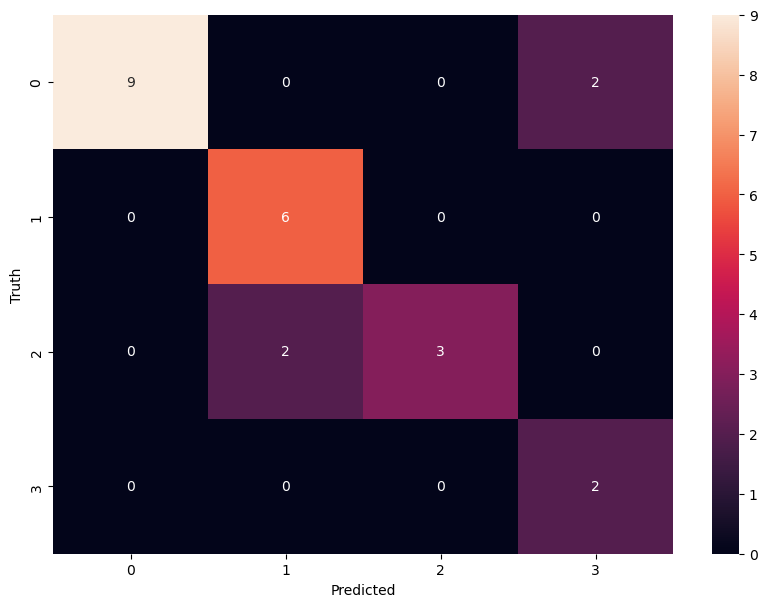

In [90]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 